## a-AlphaBio homework 
### Run inference with some of the trained models
### Mark Thompson
### Started April 29, 2024 

In [1]:
%load_ext autoreload

In [2]:
%autoreload
# import libraries
import numpy as np
import pickle as pk
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
%matplotlib inline

---------
### Holdout dataset

In [3]:
# The holdout data
data_file = '../data/alphaseq_data_hold_out.csv'
df = pd.read_csv(data_file)
rows1 = df.shape[0]
print('holdout dataframe has', rows1, 'rows')
print(df.columns.tolist())
print(df['sequence_a'].describe())

holdout dataframe has 30071 rows
['description_a', 'sequence_a', 'description_alpha', 'sequence_alpha']
count                                                 30071
unique                                                29971
top       QVQLVQSGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLE...
freq                                                    101
Name: sequence_a, dtype: object


In [8]:
import torch
import torch.nn as nn

# Some plotting functions
#
def plot_preds_hist(preds_file_path):
    preds = pk.load(open(preds_file_path, 'rb'))
    print('len(preds):', len(preds))
    preds = [p[0] for p in preds]
    print('preds[0:10]:', preds[0:10])

    # Histogram of predicted values
    plt.hist(preds, bins=100)
    plt.xlabel('pred Kd (nm)')
    plt.ylabel('count')
    plt.title('Distribution of pred values on holdout set')
    plt.show()


def plot_pred_vs_true(preds_file_path, true_file_path, xlim=(0,5), ylim=(0,5)):
    preds = pk.load(open(preds_file_path, 'rb'))
    y = pk.load(open(true_file_path, 'rb'))
    print('len(preds):', len(preds), ', len(y):', len(y))
    preds = [p[0] for p in preds]
    print('preds[0:10]:', preds[0:10])

    # RMSE
    rmse = math.sqrt(np.mean((np.array(y) - np.array(preds))**2))
    print('rmse:', rmse)

    # MSE
    mse = np.mean((np.array(y) - np.array(preds))**2)
    print('mse:', mse)

    mse2 = nn.MSELoss()(torch.tensor(preds), torch.tensor(y))
    print('mse2:', mse2)

    # MAE
    mae = np.mean(np.abs(np.array(y) - np.array(preds)))
    print('mae:', mae) 

    # Mean and standard deviation of the error
    mean = np.mean(np.array(y) - np.array(preds))
    std = np.std(np.array(y) - np.array(preds))
    print('Error: mean:', mean, ', std:', std)

    # Median of the absolute percentage error
    mdape = np.median(np.abs(np.array(y) - np.array(preds))/np.array(y))
    print('mdape:', mdape)

    # PPE10: percentage of time the prediction is within 10 percent of the ground truth
    ppe10 = np.mean(np.abs(np.array(y) - np.array(preds))/np.array(y) < 0.1)
    print('ppe10:', ppe10)

    # scatter plot of true vs pred
    plt.scatter(y, preds, c ="blue")
    plt.xlabel('experimental Kd (nm)')
    plt.ylabel('predicted Kd (nm)')
    plt.title('true vs predicted Kd on validation set')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()


----
### MLP model

In [ ]:
pred_file_path = '../inference_results/preds_mlp.pkl'
plot_preds_hist(pred_file_path)

In [ ]:
pred_file_path = '../inference_results/preds_mlp_1714519460.345232.pkl'
true_file_path = '../inference_results/y_mlp_1714519460.3456798.pkl'
plot_pred_vs_true(pred_file_path, true_file_path)

----
### Dense MLP model

In [ ]:
pred_file_path = '../inference_results/preds_dense_mlp.pkl'
plot_preds_hist(pred_file_path)

In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/preds_dense_mlp_1714520055.8448465.pkl'
true_file_path = '../inference_results/y_dense_mlp_1714520055.845317.pkl'
plot_pred_vs_true(pred_file_path, true_file_path)

----
### Residual MLP

In [ ]:
pred_file_path = '../inference_results/preds_residual_mlp_1714622884.672657.pkl'
plot_preds_hist(pred_file_path)

In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/preds_residual_mlp_1714622963.854741.pkl'
true_file_path = '../inference_results/y_residual_mlp_1714622963.855089.pkl'
plot_pred_vs_true(pred_file_path, true_file_path)

----
### Residual MLP Clean-3 Dataset

In [ ]:
pred_file_path = ''
plot_preds_hist(pred_file_path)

In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/residual_mlp/cleaned-3/preds_residual_mlp_1714757964.5337942.pkl'
true_file_path = '../inference_results/residual_mlp/cleaned-3/y_residual_mlp_1714757964.534088.pkl'
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))

-------
### Vision Transform Model (VIT)

In [ ]:
pred_file_path = '../inference_results/preds_vit_1714621857.9278982.pkl'
plot_preds_hist(pred_file_path)

In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/preds_vit_1714622048.243739.pkl'
true_file_path = '../inference_results/y_vit_1714622048.2449658.pkl'
plot_pred_vs_true(pred_file_path, true_file_path)

-------
### Vision Transform Model (VIT)  Clean-2 Dataset

In [ ]:
pred_file_path = '../inference_results/vit/cleaned-2/preds_vit_1714662361.943635.pkl'
plot_preds_hist(pred_file_path)

In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/vit/cleaned-2/preds_vit_1714662684.9658298.pkl'
true_file_path = '../inference_results/vit/cleaned-2/y_vit_1714662684.967206.pkl'
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,4), ylim=(0,4))

-------
### Vision Transform Model (VIT)  1-channel Clean-3 Dataset

In [ ]:
pred_file_path = ''
plot_preds_hist(pred_file_path)

len(preds): 925 , len(y): 925
preds[0:10]: [2.3592278957366943, 2.821248769760132, 2.7827048301696777, 2.555321455001831, 1.1597979068756104, 2.3845155239105225, 2.458963394165039, 2.119753837585449, 2.20592999458313, 2.416740655899048]
rmse: 0.9510290437770199
mse: 0.9044562421074328
mse2: tensor(0.9045)
mae: 0.7615171469212624
Error: mean: 0.04496103351180618 , std: 0.9499656559965646
mdape: 0.33323476652924955
ppe10: 0.2090834185536888


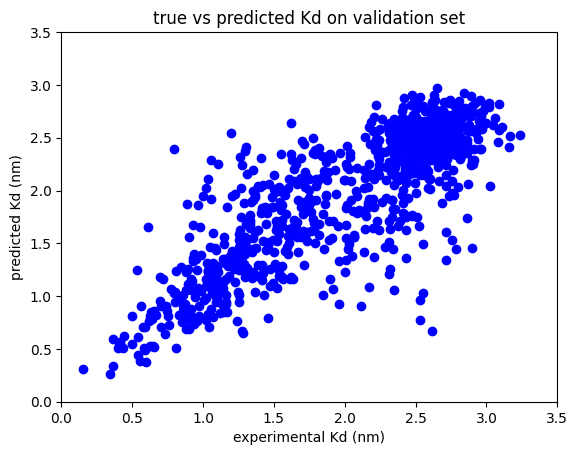

In [11]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/vit_model/cleaned-3/BW/preds_vit_1714868230.7190938.pkl'
true_file_path = '../inference_results/vit_model/cleaned-3/BW/y_vit_1714868230.7193077.pkl'
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))


----
### Vision Transformer 3-channel,  Clean-3 Dataset

mean of the losses: 0.13381104
len(preds): 925 , len(y): 925
preds[0:10]: [2.66090989112854, 2.8546817302703857, 2.9130852222442627, 2.7158758640289307, 0.8878709673881531, 2.5377018451690674, 2.4210543632507324, 2.6191487312316895, 2.0934550762176514, 2.6161181926727295]
rmse: 0.988342947428733
mse: 0.9768217817321153
mse2: tensor(0.9768)
mae: 0.7889676365765975
Error: mean: 0.009215544752172521 , std: 0.9882999825291086
mdape: 0.35251281507235754
ppe10: 0.21473425858290723


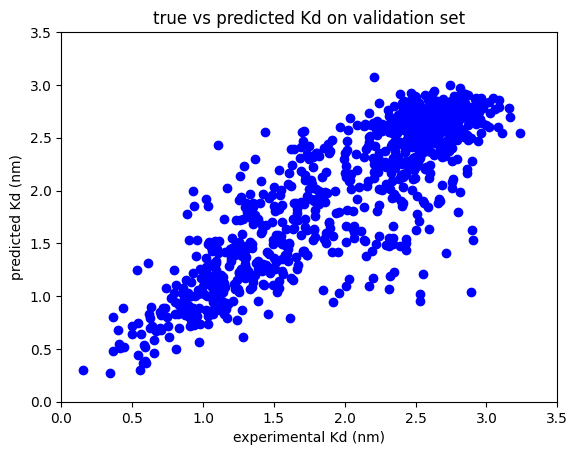

In [21]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/vit_model/cleaned-3/BGR/preds_vit_1714883259.9500844.pkl'
true_file_path = '../inference_results/vit_model/cleaned-3/BGR/y_vit_1714883259.9503129.pkl'

losses = pk.load(open('/home/mark/dev/aAlphaBio-Homework/inference_results/vit_model/cleaned-3/BGR/loss_vit_1714883259.9504397.pkl', 'rb'))
# mean of the losses
print('mean of the losses:', np.mean(losses))

plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))



----
### TFormMLP model Clean-3 Dataset

In [ ]:
pred_file_path = ''
plot_preds_hist(pred_file_path)

len(preds): 925 , len(y): 925
preds[0:10]: [2.525968551635742, 2.7634024620056152, 2.7433676719665527, 2.627709150314331, 0.849454939365387, 2.5310723781585693, 2.4501826763153076, 2.427826166152954, 1.857858657836914, 2.667675256729126]
rmse: 0.9955268135251945
mse: 0.9910736364476272
mse2: tensor(0.9911)
mae: 0.7942815240215785
Error: mean: 0.08824656227150479 , std: 0.9916078764788471
mdape: 0.36467466835123186
ppe10: 0.21592286340394448


/home/mark/anaconda3/envs/avm-dvm/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([925, 1])) that is different to the input size (torch.Size([925])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


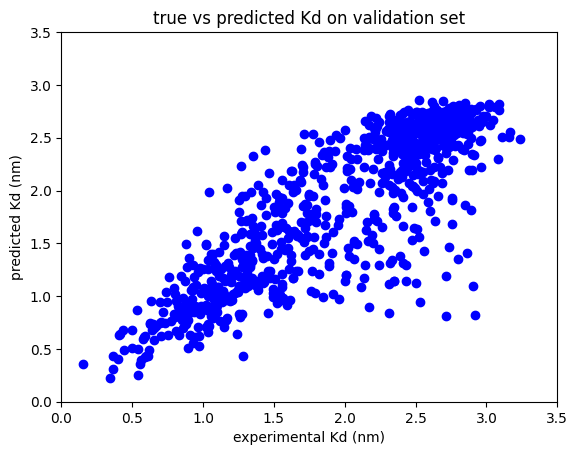

In [9]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/tform_mlp_model/cleaned-3/preds_tform_mlp_1714860545.1421924.pkl'
true_file_path = '../inference_results/tform_mlp_model/cleaned-3/y_tform_mlp_1714860545.1423948.pkl'
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))

----
### BERT
Unfreeze last 3 layers of transformer


In [ ]:
pred_file_path = '''
plot_preds_hist(pred_file_path)

In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/bert/clean_3_dataset/unfreeze_last_3_layers/preds_bert_1714674435.8165665.pkl'
true_file_path = '../inference_results/bert/clean_3_dataset/unfreeze_last_3_layers/y_bert_1714674435.8167834.pkl'
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,4), ylim=(0,4))

----
### BERT
All layers of transformer are frozen


In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/bert/clean_3_dataset/unfreeze_last_0_layers/preds_bert_1714675343.229837.pkl'
true_file_path = '../inference_results/bert/clean_3_dataset/unfreeze_last_0_layers/y_bert_1714675343.2300615.pkl'
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,4), ylim=(0,4))